In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
car = pd.read_csv('data.csv')

In [31]:
car

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [32]:
#1 clean the given data
car.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [33]:
car.duplicated().sum()

715

In [34]:
car.drop_duplicates(inplace=True)

In [35]:
car.duplicated().sum()

0

In [36]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11196 non-null  object 
 4   Engine HP          11130 non-null  float64
 5   Engine Cylinders   11169 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11193 non-null  float64
 9   Market Category    7823 non-null   object 
 10  Vehicle Size       11199 non-null  object 
 11  Vehicle Style      11199 non-null  object 
 12  highway MPG        11199 non-null  int64  
 13  city mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(3), int64(5), ob

In [37]:
car.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11199.000000,11130.000000,11169.000000,11193.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,2010.714528,253.388859,5.665950,3.454123,26.610590,19.731851,1558.483347,4.192593e+04
std,7.228211,110.150938,1.797021,0.872946,8.977641,9.177555,1445.668872,6.153505e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159950e+04
50%,2015.000000,239.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [38]:
#2 Top 5 most makes
car['Make'].value_counts().head(5)


Make
Chevrolet     1083
Ford           825
Toyota         719
Volkswagen     568
Nissan         551
Name: count, dtype: int64

In [39]:
#3 Most used vehicle sizes by popularity
car.groupby(['Vehicle Size'])['Popularity'].sum().head(1)

Vehicle Size
Compact    6420748
Name: Popularity, dtype: int64

In [40]:
#4 Total no. of car that have vehicle style of 'Coupe' and 'Driven wheels' are 'rear wheel drive'
car[(car['Vehicle Style']=='Coupe') & (car['Driven_Wheels']=='rear wheel drive')].shape[0]

662

In [41]:
#5 Print the Dataframe containing 'Make','Engine Cylinders', 'Number of doors', 'Transmission Type','Vehicle Style' of the cars that have Transmission type of MANUAL and have 2 doors
car[(car['Transmission Type']=='MANUAL') & (car['Number of Doors']==2.0)].head(20)[['Make','Number of Doors','Engine Cylinders', 'Vehicle Style','Transmission Type']]

,Make,Number of Doors,Engine Cylinders,Vehicle Style,Transmission Type
0,BMW,2.0,6.0,Coupe,MANUAL
1,BMW,2.0,6.0,Convertible,MANUAL
2,BMW,2.0,6.0,Coupe,MANUAL
3,BMW,2.0,6.0,Coupe,MANUAL
4,BMW,2.0,6.0,Convertible,MANUAL
5,BMW,2.0,6.0,Coupe,MANUAL
6,BMW,2.0,6.0,Convertible,MANUAL
7,BMW,2.0,6.0,Coupe,MANUAL
8,BMW,2.0,6.0,Convertible,MANUAL
9,BMW,2.0,6.0,Convertible,MANUAL


In [42]:
#6 How many convertible cars have been produced in year 2014
car[(car['Vehicle Style']=='Convertible') & (car['Year']==2014)].shape[0]

76

In [43]:
#7 Max and min of MSRP for each Vehicle type
car.groupby('Vehicle Size')['MSRP'].agg([max,min])

C:\Users\DELL\AppData\Local\Temp\ipykernel_24980\443255379.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  car.groupby('Vehicle Size')['MSRP'].agg([max,min])
C:\Users\DELL\AppData\Local\Temp\ipykernel_24980\443255379.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  car.groupby('Vehicle Size')['MSRP'].agg([max,min])


,max,min
Vehicle Size,,
Compact,2065902,2000
Large,1382750,2000
Midsize,548800,2000


In [44]:
#8 Sorting the dataset with 'highway MPG' in descending order and Creating Dataframe of 'Model','Year','Transmission Type','highway MPG','Make'.
car.sort_values(by='highway MPG',ascending=False).head(5)[['Model','Year','Transmission Type','highway MPG','Make']]

,Model,Year,Transmission Type,highway MPG,Make
1119,A6,2017,AUTOMATED_MANUAL,354,Audi
5792,i3,2017,DIRECT_DRIVE,111,BMW
5791,i3,2016,DIRECT_DRIVE,111,BMW
5790,i3,2015,DIRECT_DRIVE,111,BMW
1983,Bolt EV,2017,DIRECT_DRIVE,110,Chevrolet


In [45]:
#9 Create a Dataframe for car model showing maximum and minimum on 'City MPG'
car.groupby('Model')['city mpg'].agg([max,min]).head(10)

C:\Users\DELL\AppData\Local\Temp\ipykernel_24980\1504873694.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  car.groupby('Model')['city mpg'].agg([max,min]).head(10)
C:\Users\DELL\AppData\Local\Temp\ipykernel_24980\1504873694.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  car.groupby('Model')['city mpg'].agg([max,min]).head(10)


,max,min
Model,,
1 Series,20,17
1 Series M,19,19
100,17,16
124 Spider,26,26
190-Class,18,17
2,29,28
2 Series,24,20
200,23,15
200SX,26,20


## City MPG vs MSRP

From this bargraph we can conclude that Cars that have highest MSRP (price) have the lowest MPG in the city. 

The most car are having the city MPG of 18 Miles Per Gallon.

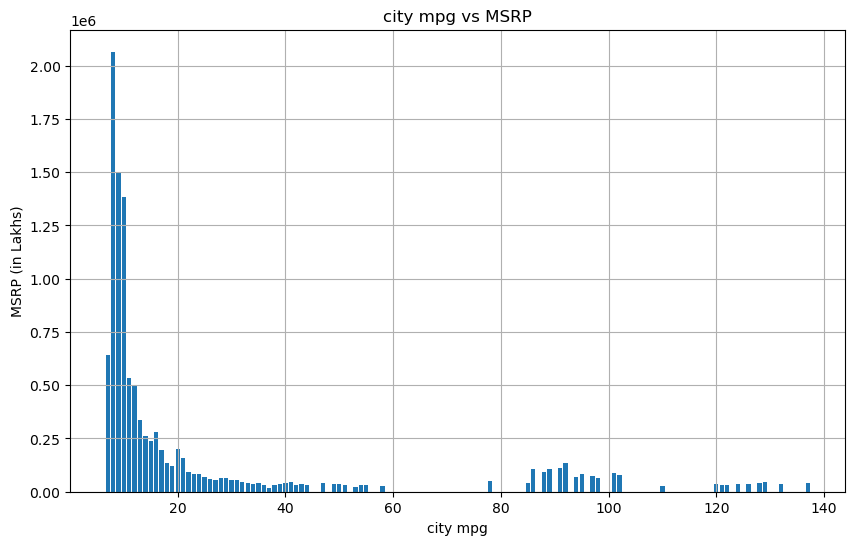

In [46]:
#10
plt.figure(figsize=(10,6))
plt.bar(car['city mpg'], car['MSRP'])
plt.title('city mpg vs MSRP')
plt.xlabel('city mpg')
plt.ylabel('MSRP (in Lakhs)')
plt.grid()
plt.show()

## Top 5 Cars by their No. of Count

C:\Users\DELL\AppData\Local\Temp\ipykernel_24980\3276910451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cars.index, y=top_cars.values,palette='Set2')


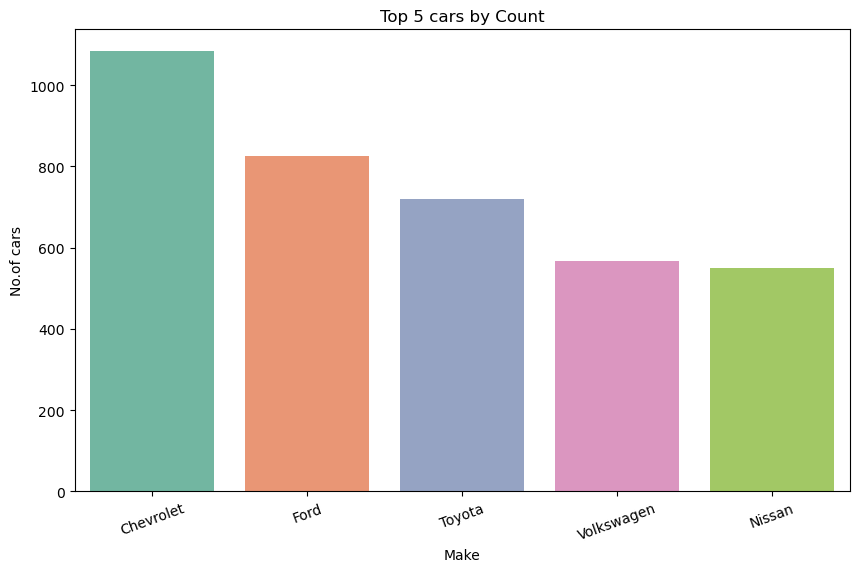

In [47]:
#11
top_cars= car['Make'].value_counts().head(5)
plt.figure(figsize=(10,6))
sns.barplot(x=top_cars.index, y=top_cars.values,palette='Set2')
plt.xticks(rotation=20)
plt.xlabel('Make')
plt.ylabel('No.of cars')
plt.title('Top 5 cars by Count')
plt.show()

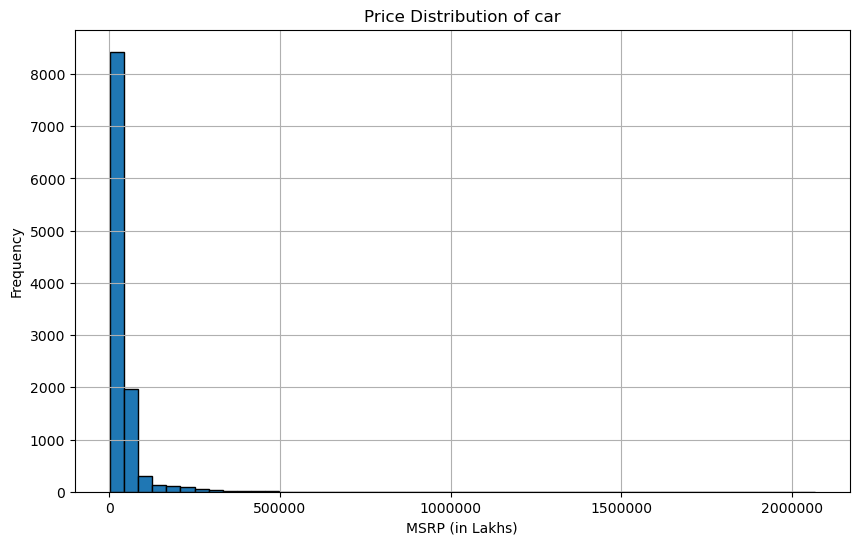

In [52]:
#12
plt.figure(figsize=(10,6))
plt.hist(car['MSRP'],bins=50,edgecolor='Black')

plt.ticklabel_format(style='plain',axis='x')
plt.xlabel('MSRP (in Lakhs)')
plt.ylabel('Frequency')
plt.title('Price Distribution of car')
plt.grid()
plt.show()

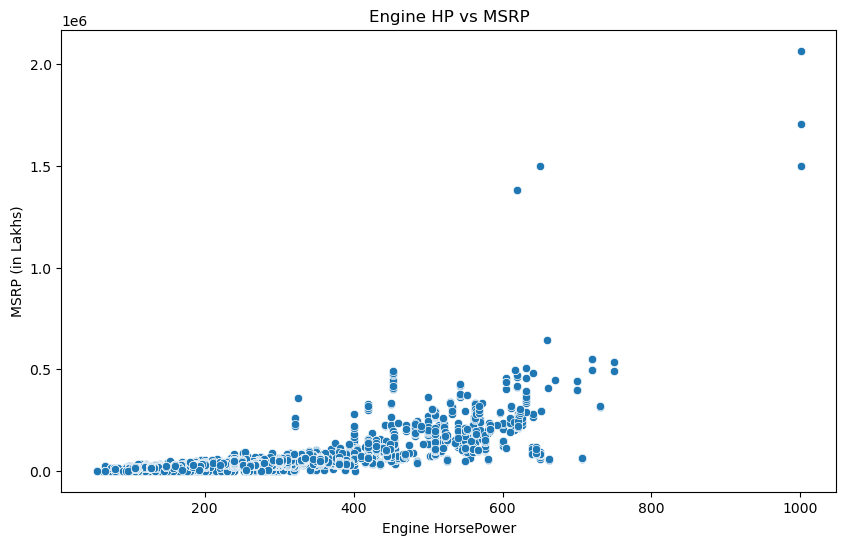

In [49]:
#13
plt.figure(figsize=(10,6))
sns.scatterplot(data=car, x='Engine HP', y='MSRP')
plt.xlabel('Engine HorsePower')
plt.ylabel('MSRP (in Lakhs)')
plt.title('Engine HP vs MSRP')
plt.show()

## Showing average MSRP over the different Years

- The average car prices has been increased over the years.
- There is a sudden spike in the rise of the price of the cars after the year 2000.
- The highest car prices was in the year 2014 but after 2014 the car prices has been fallen.

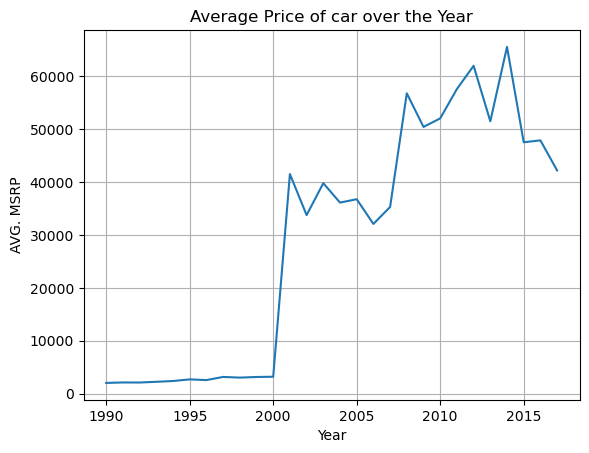

In [50]:
#14
avg_MSRP = car.groupby('Year')['MSRP'].mean()
sns.lineplot(x=avg_MSRP.index, y=avg_MSRP.values)
plt.xlabel('Year')
plt.ylabel('AVG. MSRP')
plt.title('Average Price of car over the Year')
plt.grid()
plt.show()

## Vehicle style vs Highway MPG

- This bar graph show the information that Vehicle Style with '4dr Hatchback' has the highest highway MPG 37 Miles Per Gallon.
- And 'Cargo Van' has the lowest highway MPG of 17 Miles Per Gallon. 

C:\Users\DELL\AppData\Local\Temp\ipykernel_24980\2281100990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=car, x='Vehicle Style', y='highway MPG', errorbar=None, palette='viridis')


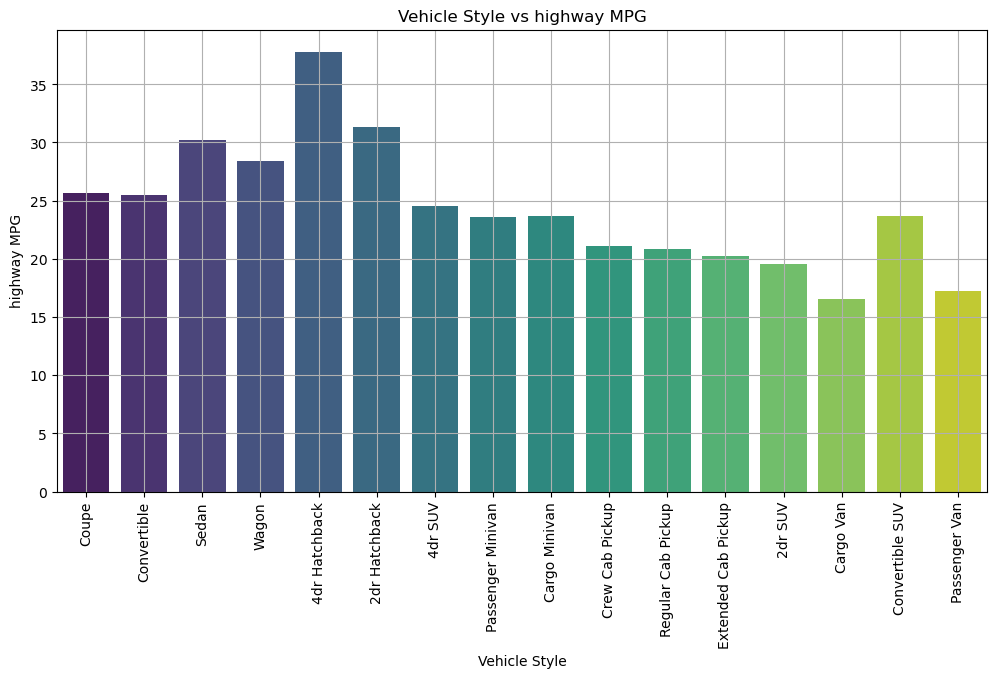

In [53]:
#15
plt.figure(figsize=(12,6))
sns.barplot(data=car, x='Vehicle Style', y='highway MPG', errorbar=None, palette='viridis')
plt.xticks(rotation=90)
plt.title('Vehicle Style vs highway MPG')
plt.show()

### CONCLUSION
- The average Engine Horse Power of the car is 253.
- The average Engine Cylinders that cars have is 3.
- The average Highway MPG of car is 26.61.
- The average city MPG of car is 19.73.
- The most popular car size is 'Compact' size cars.
- In the year 2014 '76' convertible cars has been sold.
- From the above inspection we can conclude that the cars of each vehicle size has minimum MSRP(price) of 2000.